<p align="center">
    <img src="title_image.png" width="60%" style="border-radius: 10px;">
</p>

<h1 style="text-align:center; font-family:Segoe UI, sans-serif; color:#b08907;">
📊 Telco Customer Churn Prediction & Retention Strategy
</h1>

<p style="text-align:center; font-size:16px; color:#555;">
A Machine Learning project focused on predicting customer churn and driving actionable retention insights using interpretable AI.
</p>

<hr>

<p style="text-align:center; font-size:15px;">
<strong>Author:</strong> Abdullah Hanjra &nbsp; | &nbsp;
<a href="mailto:abdullahhunjra@gmail.com">📧 Email</a> &nbsp; | &nbsp;
<a href="https://www.linkedin.com/in/abdullahhunjra" target="_blank">🔗 LinkedIn</a> &nbsp; | &nbsp;
<a href="https://github.com/abdullahhunjra" target="_blank">💻 GitHub</a>
</p>


# 📌 Problem Statement

Customer churn — when a customer stops doing business with a company — is a major concern for subscription-based services like telecom companies. Predicting which customers are likely to churn helps businesses proactively engage with high-risk customers to improve retention.

This project aims to build a machine learning model that can accurately identify customers who are at risk of churning based on their service usage and demographic information.


## 🎯 Project Objectives

- Understand the patterns of churn from customer data  
- Handle missing values, inconsistent data, and class imbalance  
- Perform feature selection to retain most important predictors  
- Train multiple ML models and optimize for **recall** to catch churners  
- Interpret model predictions using SHAP for transparency  
- Provide business-driven recommendations based on insights


In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import precision_recall_curve, average_precision_score, accuracy_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.feature_selection import SelectFromModel, SelectKBest, mutual_info_classif
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

import joblib
import os
# Create necessary directories if they do not exist
os.makedirs("shap", exist_ok=True)
os.makedirs("models", exist_ok=True)
os.makedirs("EDA", exist_ok=True)

import shap

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn.linear_model')

pd.set_option('display.max_columns', None)

%matplotlib inline



In [51]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 📊 Dataset Overview

The dataset comes from a telecom provider and contains information about **7,043 customers**.

- **Target Variable:** `Churn` (Yes / No)

### 🧾 Feature Dictionary

| Feature               | Description                                                                 |
|-----------------------|-----------------------------------------------------------------------------|
| `customerID`          | Unique ID of the customer                                                   |
| `gender`              | Male or Female                                                              |
| `SeniorCitizen`       | Whether the customer is a senior citizen (1: Yes, 0: No)                   |
| `Partner`             | Has a partner (Yes/No)                                                      |
| `Dependents`          | Has dependents (Yes/No)                                                     |
| `tenure`              | Number of months the customer has stayed with the company                   |
| `PhoneService`        | Whether the customer has phone service                                      |
| `MultipleLines`       | Whether the customer has multiple lines                                     |
| `InternetService`     | Type of internet service: DSL, Fiber optic, None                            |
| `OnlineSecurity`      | Whether the customer has online security add-on                             |
| `OnlineBackup`        | Whether the customer has online backup add-on                               |
| `DeviceProtection`    | Whether the customer has device protection add-on                           |
| `TechSupport`         | Whether the customer has tech support add-on                                |
| `StreamingTV`         | Whether the customer streams TV                                             |
| `StreamingMovies`     | Whether the customer streams movies                                         |
| `Contract`            | Contract type: Month-to-month, One year, Two year                           |
| `PaperlessBilling`    | Whether billing is paperless                                                |
| `PaymentMethod`       | Payment method (e.g., Electronic check, Credit card, etc.)                  |
| `MonthlyCharges`      | Monthly amount charged to the customer                                      |
| `TotalCharges`        | Total amount charged                                                        |


In [52]:
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Dataset Overview

The dataset used in this project consists of **7,043 customer records** and **21 features** related to customer demographics, account information, internet services, and contract details.

Each record represents a unique customer, and the dataset is designed to predict customer attrition—commonly referred to as **churn**. The target variable is:

- **`Churn`**: Indicates whether the customer has left the company (**Yes**) or is still active (**No**).



In [53]:
# We have changes datatype of 'TotalCharges' to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# SeniorCitizen is a binary feature, we can map it to Yes/No for better readability
df['SeniorCitizen'] = df['SeniorCitizen'].map({1: 'Yes', 0: 'No'})

**`TotalCharges`** was being treated as object type so we had to change it to correct datatype.

In [54]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


## ----------   🔍 Exploratory Data Analysis ------------------------

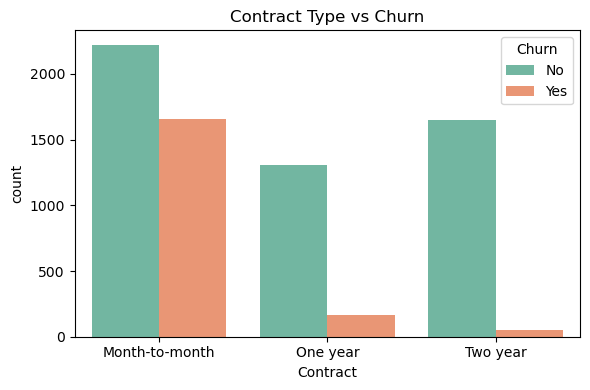

In [55]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Contract', hue='Churn', palette='Set2')
plt.title('Contract Type vs Churn')
plt.tight_layout()

# Save
plt.savefig("EDA/contract_vs_churn.png")
plt.show()


### Contract Type and Churn
-  Month-to-month customers: **42.7% churn rate**
-  One-year contract customers: **11.3% churn rate**
-  Two-year contract customers: **2.8% churn rate**
 
 **Insight**: Month-to-month subscribers have the highest churn, indicating long-term contracts reduce churn significantly.


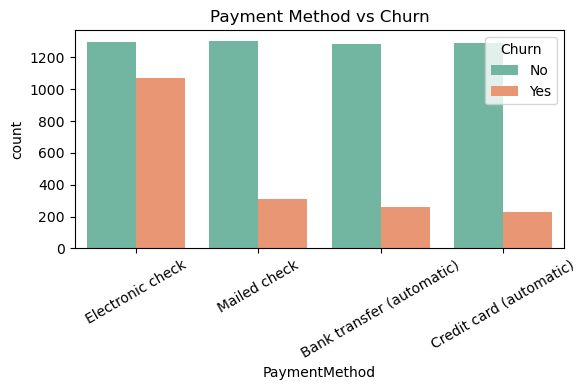

In [56]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='PaymentMethod', hue='Churn', palette='Set2')
plt.title('Payment Method vs Churn')
plt.xticks(rotation=30)
plt.tight_layout()


plt.savefig("EDA/paymentmethod_vs_churn.png")
plt.show()


### Payment Method and Churn
- **Electronic check**: 45.3% churn (1071 out of 2365)
- **Mailed check**: 19.7% churn (308 out of 1564)
- **Bank transfer (automatic)**: 16.7% churn (258 out of 1544)
- **Credit card (automatic)**: 15.3% churn (256 out of 1675)

Customers using **electronic checks** have the highest churn. Automatic payment methods show a lower likelihood of customer exit, suggesting loyalty or convenience may play a role.


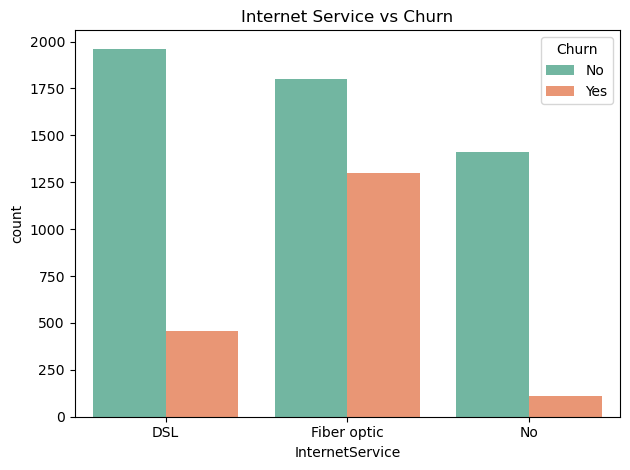

In [57]:
sns.countplot(data=df, x='InternetService', hue='Churn', palette='Set2')
plt.title('Internet Service vs Churn')
plt.tight_layout()

plt.savefig("EDA/internetservice_vs_churn.png")
plt.show()

### Internet Service Type and Churn
- **Fiber optic**: 41.3% churn (1100 out of 2667)
- **DSL**: 19.9% churn (459 out of 2300)
- **No internet**: 7.5% churn (360 out of 1943)

 Fiber optic users have a much higher churn rate, possibly due to higher expectations, cost, or competition. Customers with no internet services churn the least.


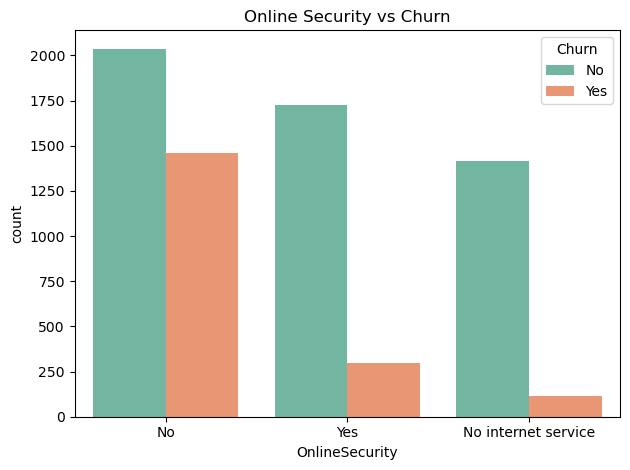

In [58]:
sns.countplot(data=df, x='OnlineSecurity', hue='Churn', palette='Set2')
plt.title('Online Security vs Churn')
plt.tight_layout()

plt.savefig("EDA/onlinesecurity_vs_churn.png")
plt.show()

### Online Security and Churn
- **No Online Security**: 42.1% churn (1130 out of 2686)
- **Online Security**: 15.3% churn (243 out of 1581)
- **No Internet Service**: 7.5% churn (360 out of 1943)

 Customers without online security are much more prone to churn, indicating that value-added services like security might help retain users.


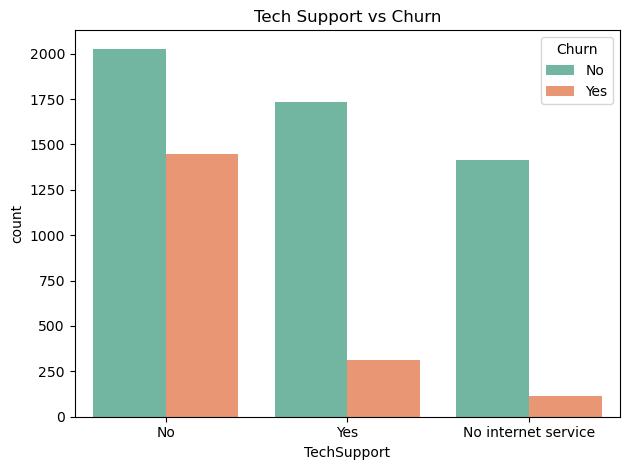

In [59]:
sns.countplot(data=df, x='TechSupport', hue='Churn', palette='Set2')
plt.title('Tech Support vs Churn')
plt.tight_layout()

plt.savefig("EDA/techsupport_vs_churn.png")
plt.show()

### Tech Support and Churn
- **No Tech Support**: 41.7% churn (1106 out of 2654)
- **Tech Support**: 14.8% churn (234 out of 1583)
- **No Internet Service**: 7.5% churn (360 out of 1943)

 Similar to online security, lack of technical support appears to contribute significantly to churn.


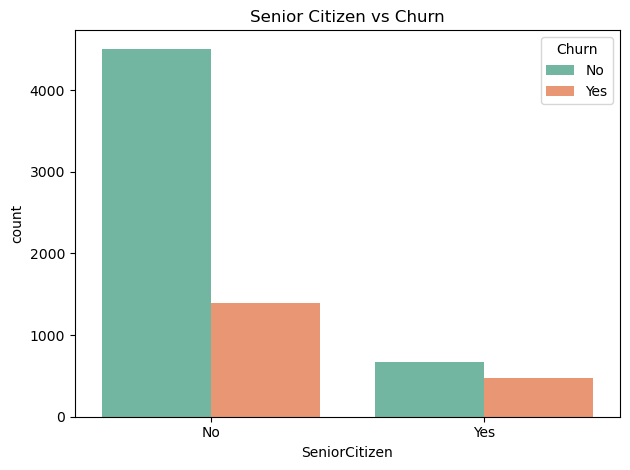

In [60]:
sns.countplot(data=df, x='SeniorCitizen', hue='Churn', palette='Set2')
plt.title('Senior Citizen vs Churn')
plt.tight_layout()


plt.savefig("EDA/seniorcitizen_vs_churn.png")
plt.show()

### Senior Citizens and Churn
- **Senior Citizens**: 41.7% churn (476 out of 1142)
- **Non-Senior Citizens**: 23.7% churn (1393 out of 5890)

 Senior citizens are more likely to churn than younger users. This demographic may benefit from tailored services or communication strategies.


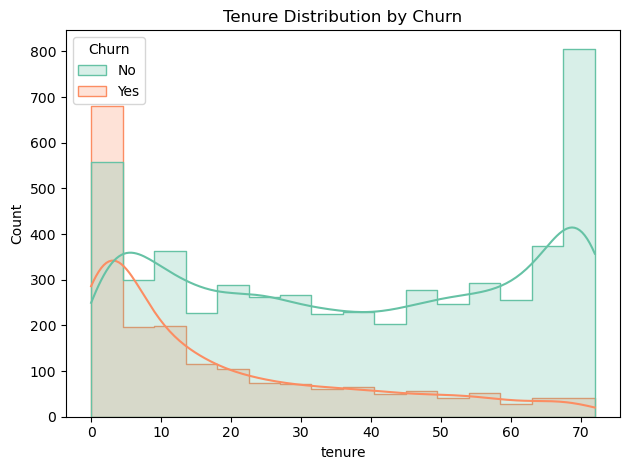

In [61]:
sns.histplot(data=df, x='tenure', hue='Churn', kde=True, palette='Set2', element='step')
plt.title('Tenure Distribution by Churn')
plt.tight_layout()


plt.savefig("EDA/tenure_by_churn.png")  
plt.show()


### Tenure and Churn
- Customers with tenure **< 12 months** have the highest churn.
- Churn decreases significantly after **2 years** of service.

 New customers are more likely to churn early. Improving onboarding and engagement in the first year may improve retention.


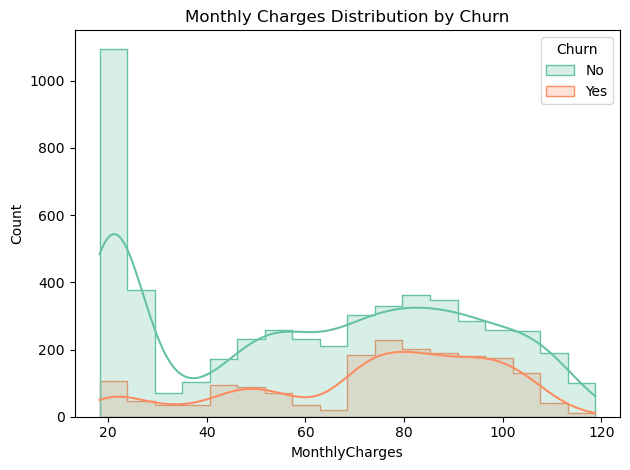

In [62]:
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', kde=True, palette='Set2', element='step')
plt.title('Monthly Charges Distribution by Churn')
plt.tight_layout()

plt.savefig("EDA/monthlycharges_by_churn.png")
plt.show()

### Monthly Charges and Churn
- Customers with **high monthly charges** show a higher likelihood of churn.
- The churn curve shifts noticeably upward beyond **$70/month**.

 High-cost plans may need better value communication or bundling offers to reduce dissatisfaction.


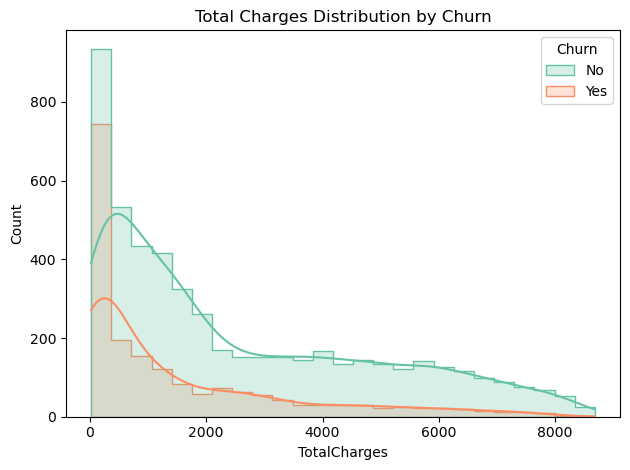

In [63]:
sns.histplot(data=df, x='TotalCharges', hue='Churn', kde=True, palette='Set2', element='step')
plt.title('Total Charges Distribution by Churn')
plt.tight_layout()

plt.savefig("EDA/totalcharges_by_churn.png")
plt.show()

### Total Charges and Churn
- Customers with **low total charges** are more likely to churn.
- Higher total charges correlate with longer tenure and reduced churn.

 TotalCharges may be a proxy for loyalty; newer customers with low lifetime value are more likely to churn.


### ----------   🔍 Exploratory Data Analysis Summary ------------------------

- **Contract type** plays a major role in churn — short-term (month-to-month) users churn at significantly higher rates.
- **Electronic check** payments are a strong churn indicator, while automatic payments show loyalty.
- Lack of **online security** or **tech support** greatly increases the risk of churn.
- **Senior citizens** are more likely to churn than younger customers.
- Customers with **short tenure**, **low total charges**, and **high monthly charges** are more prone to churn.
- **Fiber optic** internet customers show higher churn than DSL users.

These findings highlight actionable insights — such as promoting long-term contracts, bundling security/support, and targeted retention efforts for high-risk groups.


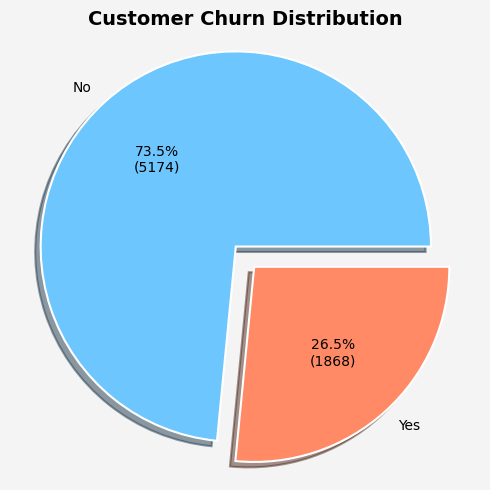

In [64]:
churn_counts = df['Churn'].value_counts()
colors = ['#6EC6FF', '#FF8A65']  # light blue, soft coral

plt.figure(figsize=(5, 5), facecolor='#f4f4f4')
plt.pie(
    churn_counts,
    labels=churn_counts.index,
    autopct=lambda p: f'{p:.1f}%\n({int(p * sum(churn_counts) / 100)})',
    shadow=True,
    explode=[0.07] * len(churn_counts),
    colors=colors,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.5}
)
plt.title('Customer Churn Distribution', fontsize=14, weight='bold')
plt.axis('equal')
plt.tight_layout()

plt.savefig("EDA/churn_distribution_imbalanced.png")
plt.show()


## ⚖️ Class Imbalance Handling

Churn data was imbalanced (e.g., 73% vs. 27%), leading to poor recall.

- Used **undersampling** to balance classes (50/50 split)
- This significantly improved model’s ability to detect churners (recall)


In [65]:
# Minority: customers who churned ('Yes')
minority_class = df[df['Churn'] == 'Yes']   # 1869 rows
majority_class = df[df['Churn'] == 'No']    # 5174 rows

# Downsample majority class to match minority class
majority_downsampled = resample(
    majority_class,
    replace=False,
    n_samples=len(minority_class),  # 1869
    random_state=42
)

# Combine into a balanced DataFrame
df_balanced = pd.concat([minority_class, majority_downsampled])
df= df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Confirm new balance
print(df['Churn'].value_counts())


Churn
Yes    1869
No     1869
Name: count, dtype: int64


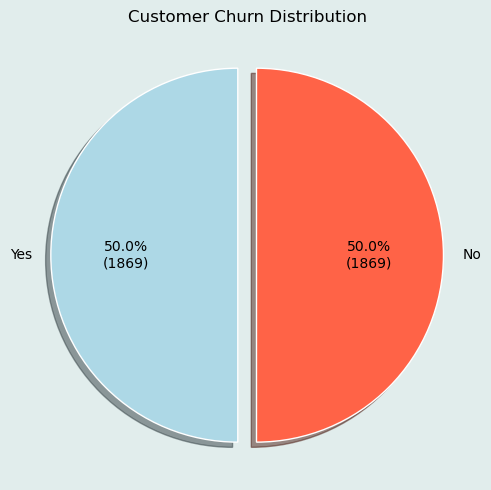

In [66]:
churn_counts = df['Churn'].value_counts()
labels = churn_counts.index
sizes = churn_counts.values

# Explode: separate slices
explode = [0.05] * len(sizes)

# Custom autopct: show % and count
def format_autopct(pct):
    total = sum(sizes)
    count = int(round(pct * total / 100.0))
    return f'{pct:.1f}%\n({count})'  # percent on top, count below


plt.figure(figsize=(5, 5), facecolor='#e1edec')  

plt.pie(
    sizes,
    labels=labels,
    autopct=format_autopct,
    startangle=90,
    colors=['lightblue', 'tomato'],
    explode=explode,
    shadow=True,
    wedgeprops={'edgecolor': 'white'}
)

plt.title('Customer Churn Distribution')
plt.axis('equal')
plt.tight_layout()
plt.savefig("EDA/churn_distribution_balanced.png")
plt.show()


In [67]:
# CustomerID is not useful for analysis, so we can drop it
df.drop('customerID', axis=1, inplace=True)


In [68]:
cat_cols = ['gender', 'SeniorCitizen','Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod']

In [69]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3738 entries, 0 to 3737
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            3738 non-null   object 
 1   SeniorCitizen     3738 non-null   object 
 2   Partner           3738 non-null   object 
 3   Dependents        3738 non-null   object 
 4   tenure            3738 non-null   int64  
 5   PhoneService      3738 non-null   object 
 6   MultipleLines     3738 non-null   object 
 7   InternetService   3738 non-null   object 
 8   OnlineSecurity    3738 non-null   object 
 9   OnlineBackup      3738 non-null   object 
 10  DeviceProtection  3738 non-null   object 
 11  TechSupport       3738 non-null   object 
 12  StreamingTV       3738 non-null   object 
 13  StreamingMovies   3738 non-null   object 
 14  Contract          3738 non-null   object 
 15  PaperlessBilling  3738 non-null   object 
 16  PaymentMethod     3738 non-null   object 


We have 20 features and 3738 instances in our data. 


In [71]:
print(df.duplicated().sum()," Duplicate rows found and removed")
df = df.drop_duplicates()

13  Duplicate rows found and removed


In [72]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        5
Churn               0
dtype: int64

Found 5 missing values in Total Charges column, we can simply drop these rows as it does not makes much difference

In [73]:
df.dropna(subset=['TotalCharges'], inplace=True)


##  Train-Test Split Before Scaling – A Smart Move

To ensure the integrity of our model evaluation and prevent **data leakage**, we first performed a **train-test split** before applying any scaling or encoding transformations.

Why? Because scaling on the entire dataset before splitting would allow statistical properties (like mean and variance) from the test set to influence the training process — unintentionally leaking future information and inflating performance metrics.

By splitting early, we ensure that:
- The **training set** remains isolated and is used to fit transformations.
- The **test set** is treated as unseen data, simulating real-world scenarios.

 **Good practice**: Always separate data before preprocessing when building models intended for production or evaluation.


In [74]:
X= df.drop(['Churn'],axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [75]:
# Apply LabelEncoder to each categorical column
for col in cat_cols:
    le = LabelEncoder()
    
    # Fit on training data
    le.fit(X_train[col])
    
    # Check for unseen labels in test data
    unseen = set(X_test[col].unique()) - set(le.classes_)
    if unseen:
        raise ValueError(f"Unseen labels found in column '{col}': {unseen}")
    
    # Transform both train and test
    X_train[col] = le.transform(X_train[col])
    X_test[col] = le.transform(X_test[col])



# Map 'Yes' to 1 and 'No' to 0
y_train = y_train.map({'No': 0, 'Yes': 1})
y_test = y_test.map({'No': 0, 'Yes': 1})


In [76]:
scaler = StandardScaler()

# Fit on X_train and transform both sets
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


In [77]:
# Making sure that our data is ready for modeling after preprocessing
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
956,1,0,1,1,-0.781199,1,2,1,0,0,2,0,0,0,0,1,0,0.390695,-0.635294
210,1,0,1,1,-0.615274,1,2,1,0,0,0,0,0,0,0,1,1,0.218674,-0.527568
3377,0,0,1,0,1.043968,1,2,1,0,2,2,2,2,2,1,1,0,1.518390,1.719815
1454,0,1,0,0,1.417297,1,2,1,0,0,0,0,2,0,1,0,2,0.567929,1.330720
2473,1,0,0,1,-0.739718,1,2,1,0,0,0,0,2,2,0,0,2,0.941510,-0.512175


## 🧪 Feature Selection using SelectKBest

To optimize model performance and reduce overfitting, we applied **univariate feature selection** using `SelectKBest` with the `mutual_info_classif` scoring function. This approach identifies the most informative features with respect to the target variable (`Churn`).

We evaluated the **optimal number of features (k)** using a range of values from 5 up to the total number of available features. For each value of `k`, we performed **5-fold cross-validation** to compute the average **recall score**, which is critical in churn prediction tasks (i.e., identifying customers who are likely to churn).

### 📊 Models Evaluated for Feature Selection:

- Logistic Regression  
- Random Forest  
- Gradient Boosting  
- LightGBM  
- XGBoost  

Each model was tested using the `SelectKBest` transformed feature set, and we recorded the number of features (`k`) that gave the **highest recall score** during training.

### 🎯 Why Recall?

In churn prediction, it’s more important to **correctly identify churners** (true positives) than to simply get the majority class (non-churners) right. Maximizing recall ensures we reduce false negatives — customers who churn but are not detected by the model.

### ⚖️ What Happens Next?

We will compare the performance of each model:
- On **all features**, and  
- On the **top-k selected features** determined by `SelectKBest`.

This comparison helps us determine whether a **reduced feature set** improves model performance, particularly in terms of recall and generalization.




 Evaluating: LogisticRegression


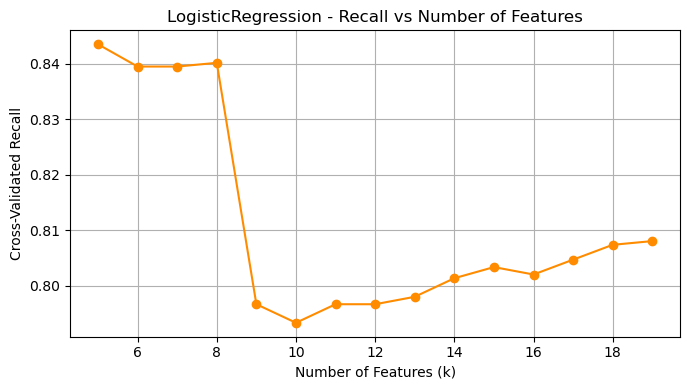

 Best k: 5, Recall: 0.8435
---------------------------------------------------------
 Selected Features: ['tenure', 'InternetService', 'OnlineSecurity', 'TechSupport', 'Contract']
---------------------------------------------------------
 Selected Features stored in → selected_features_LogisticRegression
---------------------------------------------------------

 Evaluating: RandomForest


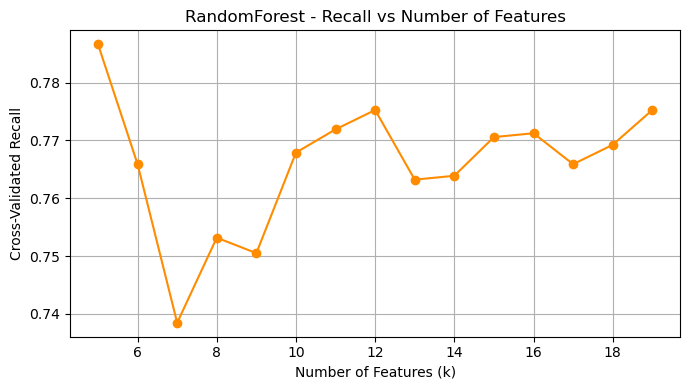

 Best k: 5, Recall: 0.7866
---------------------------------------------------------
 Selected Features: ['tenure', 'InternetService', 'OnlineSecurity', 'TechSupport', 'Contract']
---------------------------------------------------------
 Selected Features stored in → selected_features_RandomForest
---------------------------------------------------------

 Evaluating: GradientBoosting


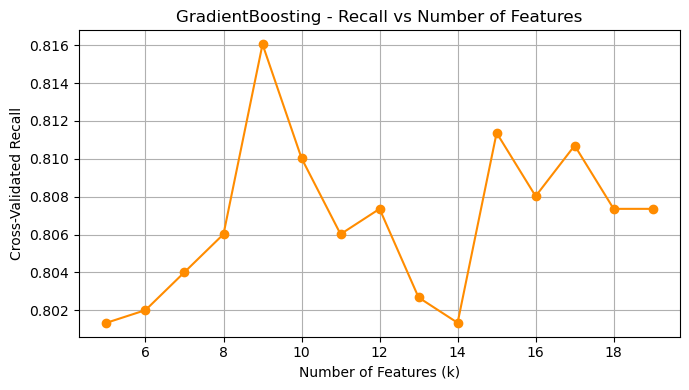

 Best k: 9, Recall: 0.8161
---------------------------------------------------------
 Selected Features: ['tenure', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract', 'PaymentMethod', 'MonthlyCharges']
---------------------------------------------------------
 Selected Features stored in → selected_features_GradientBoosting
---------------------------------------------------------

 Evaluating: LightGBM


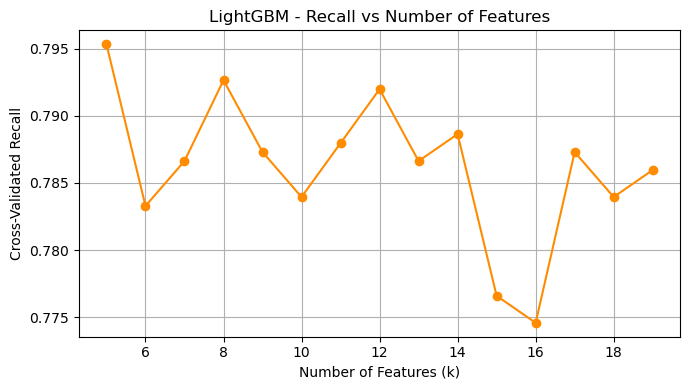

 Best k: 5, Recall: 0.7953
---------------------------------------------------------
 Selected Features: ['tenure', 'InternetService', 'OnlineSecurity', 'TechSupport', 'Contract']
---------------------------------------------------------
 Selected Features stored in → selected_features_LightGBM
---------------------------------------------------------

 Evaluating: XGBoost


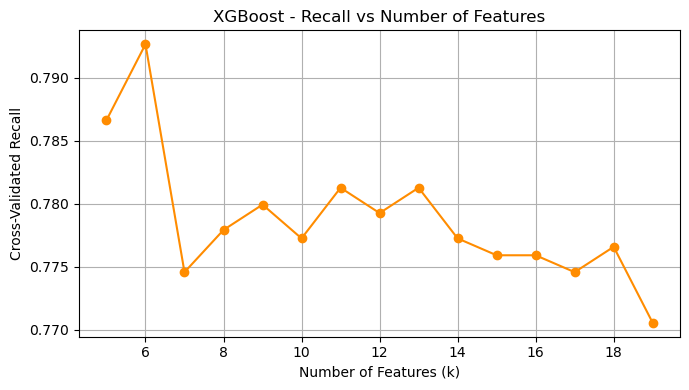

 Best k: 6, Recall: 0.7926
---------------------------------------------------------
 Selected Features: ['tenure', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'TechSupport', 'Contract']
---------------------------------------------------------
 Selected Features stored in → selected_features_XGBoost
---------------------------------------------------------


In [78]:
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'RandomForest': RandomForestClassifier(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Store model results
model_results = {}

# Loop through each model
for name, model in models.items():
    print(f"\n Evaluating: {name}")
    
    k_values = range(5, X_train.shape[1] + 1)
    mean_recalls = []
    best_recall = 0
    best_k = 0
    best_features = []

    for k in k_values:
        selector = SelectKBest(score_func=mutual_info_classif, k=k)
        X_new = selector.fit_transform(X_train, y_train)
        scores = cross_val_score(model, X_new, y_train, cv=5, scoring='recall')
        mean_score = scores.mean()
        mean_recalls.append(mean_score)

        if mean_score > best_recall:
            best_recall = mean_score
            best_k = k
            best_features = X_train.columns[selector.get_support()].tolist()

    # Dynamically store features in variable named after model
    globals()[f"selected_features_{name.replace(' ', '')}"] = best_features

    # Store results
    model_results[name] = {
        'k_values': list(k_values),
        'recalls': mean_recalls,
        'best_k': best_k,
        'best_recall': best_recall,
        'features': best_features
    }

    # Plot
    plt.figure(figsize=(7, 4))
    plt.plot(k_values, mean_recalls, marker='o', color='darkorange')
    plt.title(f'{name} - Recall vs Number of Features')
    plt.xlabel('Number of Features (k)')
    plt.ylabel('Cross-Validated Recall')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print(f" Best k: {best_k}, Recall: {best_recall:.4f}")
    print(f"---------------------------------------------------------")
    print(f" Selected Features: {best_features}")
    print(f"---------------------------------------------------------")
    print(f" Selected Features stored in → selected_features_{name.replace(' ', '')}")
    print(f"---------------------------------------------------------")


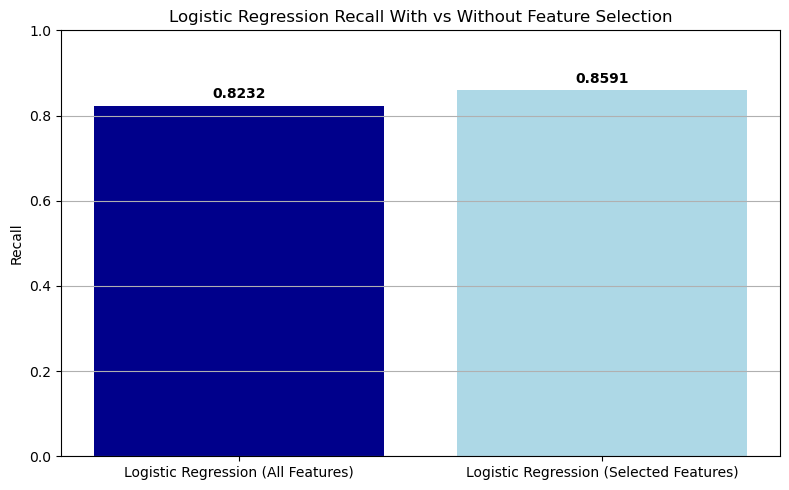

✅ Recall with all features: 0.8232
✅ Recall with selected features: 0.8591


In [79]:
# --- Logistic Regression: All features ---
lr_all = LogisticRegression(max_iter=1000)
lr_all.fit(X_train, y_train)
y_pred_all = lr_all.predict(X_test)
recall_all = recall_score(y_test, y_pred_all)

# --- Logistic Regression: Selected features ---
selected_features = selected_features_LogisticRegression  # Use the features selected by Logistic Regression
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

lr_selected = LogisticRegression(max_iter=1000)
lr_selected.fit(X_train_selected, y_train)
y_pred_selected = lr_selected.predict(X_test_selected)
recall_selected = recall_score(y_test, y_pred_selected)

# --- Plot Recall Comparison ---
labels = ['Logistic Regression (All Features)', 'Logistic Regression (Selected Features)']
recalls = [recall_all, recall_selected]

plt.figure(figsize=(8, 5))
bars = plt.bar(labels, recalls, color=['darkblue', 'lightblue'])
plt.ylabel("Recall")
plt.title("Logistic Regression Recall With vs Without Feature Selection")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()

# Annotate recall values
for bar, recall in zip(bars, recalls):
    plt.text(bar.get_x() + bar.get_width() / 2, recall + 0.01,
             f"{recall:.4f}", ha='center', va='bottom', fontweight='bold')

plt.show()

# Output selected features recall
print(f"✅ Recall with all features: {recall_all:.4f}")
print(f"✅ Recall with selected features: {recall_selected:.4f}")


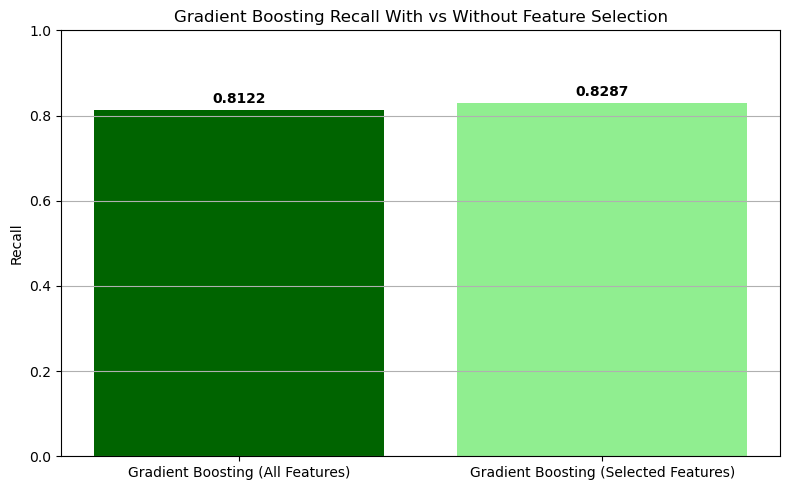

✅ Recall with all features: 0.8122
✅ Recall with selected features: 0.8287


In [80]:
# --- Gradient Boosting: All features ---
gb_all = GradientBoostingClassifier()
gb_all.fit(X_train, y_train)
y_pred_all = gb_all.predict(X_test)
recall_all = recall_score(y_test, y_pred_all)

# --- Gradient Boosting: Selected features --- 
selected_features = selected_features_GradientBoosting  # Use the features selected by Gradient Boosting
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

gb_selected = GradientBoostingClassifier()
gb_selected.fit(X_train_selected, y_train)
y_pred_selected = gb_selected.predict(X_test_selected)
recall_selected = recall_score(y_test, y_pred_selected)

# --- Plot Recall Comparison ---
labels = ['Gradient Boosting (All Features)', 'Gradient Boosting (Selected Features)']
recalls = [recall_all, recall_selected]

plt.figure(figsize=(8, 5))
bars = plt.bar(labels, recalls, color=['darkgreen', 'lightgreen'])
plt.ylabel("Recall")
plt.title("Gradient Boosting Recall With vs Without Feature Selection")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()

# Annotate recall values
for bar, recall in zip(bars, recalls):
    plt.text(bar.get_x() + bar.get_width() / 2, recall + 0.01,
             f"{recall:.4f}", ha='center', va='bottom', fontweight='bold')

plt.show()

# Output recall values
print(f"✅ Recall with all features: {recall_all:.4f}")
print(f"✅ Recall with selected features: {recall_selected:.4f}")


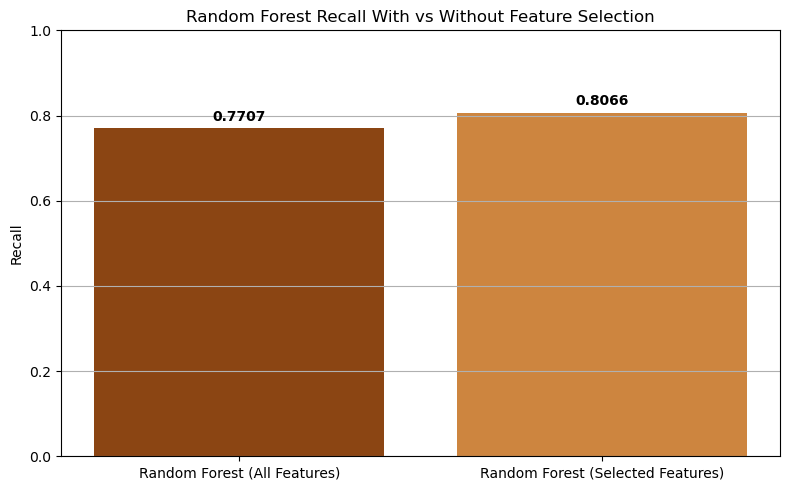

✅ Recall with all features: 0.7707
✅ Recall with selected features: 0.8066


In [81]:
# --- Random Forest: All features ---
rf_all = RandomForestClassifier(random_state=42)
rf_all.fit(X_train, y_train)
y_pred_rf_all = rf_all.predict(X_test)
recall_rf_all = recall_score(y_test, y_pred_rf_all)

# --- Random Forest: Selected features ---
selected_features_rf = selected_features_RandomForest  # Use the features selected by Random Forest
X_train_rf_selected = X_train[selected_features_rf]
X_test_rf_selected = X_test[selected_features_rf]

rf_selected = RandomForestClassifier(random_state=42)
rf_selected.fit(X_train_rf_selected, y_train)
y_pred_rf_selected = rf_selected.predict(X_test_rf_selected)
recall_rf_selected = recall_score(y_test, y_pred_rf_selected)

# --- Plot Recall Comparison ---
labels = ['Random Forest (All Features)', 'Random Forest (Selected Features)']
recalls = [recall_rf_all, recall_rf_selected]

plt.figure(figsize=(8, 5))
bars = plt.bar(labels, recalls, color=['saddlebrown', 'peru'])
plt.ylabel("Recall")
plt.title("Random Forest Recall With vs Without Feature Selection")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()

# Annotate recall values
for bar, recall in zip(bars, recalls):
    plt.text(bar.get_x() + bar.get_width() / 2, recall + 0.01,
             f"{recall:.4f}", ha='center', va='bottom', fontweight='bold')

plt.show()

# Output recall values
print(f"✅ Recall with all features: {recall_rf_all:.4f}")
print(f"✅ Recall with selected features: {recall_rf_selected:.4f}")


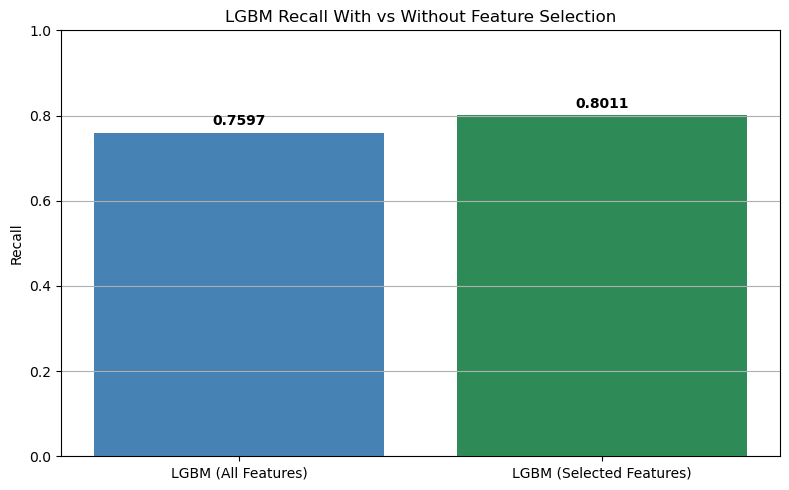

✅ Recall with all features: 0.7597
✅ Recall with selected features: 0.8011


In [82]:
# --- LGBMClassifier: All features ---
lgbm_all = LGBMClassifier()
lgbm_all.fit(X_train, y_train)
y_pred_all = lgbm_all.predict(X_test)
recall_all = recall_score(y_test, y_pred_all)

# --- LGBMClassifier: Selected features ---
selected_features = selected_features_LightGBM  # Use the features selected by LGBMClassifier
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

lgbm_selected = LGBMClassifier()
lgbm_selected.fit(X_train_selected, y_train)
y_pred_selected = lgbm_selected.predict(X_test_selected)
recall_selected = recall_score(y_test, y_pred_selected)

# --- Plot Recall Comparison ---
labels = ['LGBM (All Features)', 'LGBM (Selected Features)']
recalls = [recall_all, recall_selected]

plt.figure(figsize=(8, 5))
bars = plt.bar(labels, recalls, color=['steelblue', 'seagreen'])
plt.ylabel("Recall")
plt.title("LGBM Recall With vs Without Feature Selection")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()

# Annotate recall values
for bar, recall in zip(bars, recalls):
    plt.text(bar.get_x() + bar.get_width() / 2, recall + 0.01,
             f"{recall:.4f}", ha='center', va='bottom', fontweight='bold')

plt.show()

# Output recall values
print(f"✅ Recall with all features: {recall_all:.4f}")
print(f"✅ Recall with selected features: {recall_selected:.4f}")


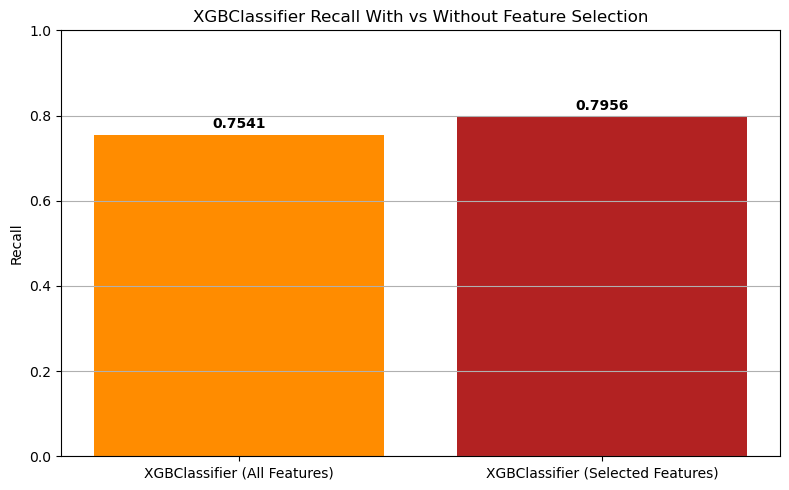

✅ Recall with all features: 0.7541
✅ Recall with selected features: 0.7956


In [83]:
# --- XGBClassifier: All features ---
xgb_all = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_all.fit(X_train, y_train)
y_pred_all = xgb_all.predict(X_test)
recall_all = recall_score(y_test, y_pred_all)

# --- XGBClassifier: Selected features ---
selected_features = selected_features_XGBoost  # Use the features selected by XGBClassifier
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

xgb_selected = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_selected.fit(X_train_selected, y_train)
y_pred_selected = xgb_selected.predict(X_test_selected)
recall_selected = recall_score(y_test, y_pred_selected)

# --- Plot Recall Comparison ---
labels = ['XGBClassifier (All Features)', 'XGBClassifier (Selected Features)']
recalls = [recall_all, recall_selected]

plt.figure(figsize=(8, 5))
bars = plt.bar(labels, recalls, color=['darkorange', 'firebrick'])
plt.ylabel("Recall")
plt.title("XGBClassifier Recall With vs Without Feature Selection")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()

# Annotate recall values
for bar, recall in zip(bars, recalls):
    plt.text(bar.get_x() + bar.get_width() / 2, recall + 0.01,
             f"{recall:.4f}", ha='center', va='bottom', fontweight='bold')

plt.show()

# Output recall values
print(f"✅ Recall with all features: {recall_all:.4f}")
print(f"✅ Recall with selected features: {recall_selected:.4f}")


##  Logistic Regression for the Win – Let’s Hyper Parameter Tune It!

After evaluating multiple models on various metrics, **Logistic Regression** emerged as the top performer in terms of **recall** when **selected features** were taken into account, which is crucial for our churn prediction task.

> Why Recall?  
> In churn prediction, false negatives (i.e., predicting a customer will stay when they actually churn) are more costly. So maximizing recall helps us catch more of the actual churners.

Since Logistic Regression performed best using default parameters, it's time to take it further with **hyperparameter tuning** to push its performance even higher.

We'll use `GridSearchCV` to find the optimal combination of parameters that maximize recall on the validation set.


In [84]:
X_train_lr = X_train[selected_features_LogisticRegression]
X_test_lr = X_test[selected_features_LogisticRegression]

# Define expanded hyperparameter grid
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga', 'lbfgs', 'newton-cg'],
    'max_iter': [100, 500, 1000, 2000],
    'l1_ratio': [0.1, 0.5, 0.7, 0.9]  # Only used for elasticnet penalty
}


grid_search = GridSearchCV(
    estimator=LogisticRegression(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_lr, y_train)

# Best parameters and model
print("\n✅ Best Hyperparameters Found:")
print(grid_search.best_params_)

best_model = grid_search.best_estimator_

# Evaluation on test set
y_pred = best_model.predict(X_test_lr)

print("\n📊 Evaluation Metrics on Test Set:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

print("\n🧾 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\n📄 Classification Report:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 1536 candidates, totalling 7680 fits


/opt/miniconda3/envs/churn_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/miniconda3/envs/churn_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/miniconda3/envs/churn_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/miniconda3/envs/churn_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/opt/miniconda3/envs/churn_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elastic


✅ Best Hyperparameters Found:
{'C': 0.01, 'l1_ratio': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}

📊 Evaluation Metrics on Test Set:
Accuracy: 0.7580645161290323
Recall: 0.856353591160221
F1 Score: 0.775

🧾 Confusion Matrix:
[[254 128]
 [ 52 310]]

📄 Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.66      0.74       382
           1       0.71      0.86      0.78       362

    accuracy                           0.76       744
   macro avg       0.77      0.76      0.76       744
weighted avg       0.77      0.76      0.76       744



## 🚫 Tuned Model vs Default Model: Decision (Logistic Regression)

After conducting hyperparameter tuning for the Logistic Regression model, we observed that the tuned model **did not outperform** the default configuration when using the selected features. Since **recall is the most critical metric** for churn prediction, the **default model with selected features** remains the preferred option.

### 🔍 Key Observations:
- **Default Logistic Regression Model (with Selected Features)**:
  - ✅ **Recall: 0.8591** (Highest)
  - F1 Score: ~**0.775**
- **Tuned Logistic Regression Model**  
  `{'C': 0.01, 'l1_ratio': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}`:
  - Recall: **0.8564**
  - Accuracy: **0.7581**
  - F1 Score: **0.775**

### ✅ Decision:
We will proceed with the **default Logistic Regression model** trained on the **selected features**, as it achieved the **highest recall**, which aligns with our business objective of minimizing false negatives (i.e., missed churners).




In [85]:
# Train using default hyperparameters with selected features
X_train_lr = X_train[selected_features_LogisticRegression]
X_test_lr = X_test[selected_features_LogisticRegression]

lr_default = LogisticRegression(max_iter=1000, random_state=42)
lr_default.fit(X_train_lr, y_train)

# Predict on test set
y_pred_default = lr_default.predict(X_test_lr)

# Evaluate
accuracy = accuracy_score(y_test, y_pred_default)
recall = recall_score(y_test, y_pred_default)
f1 = f1_score(y_test, y_pred_default)
cm = confusion_matrix(y_test, y_pred_default)
report = classification_report(y_test, y_pred_default)

# Output
print("📊 Evaluation Metrics with Default Hyperparameters:")
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("\n🧾 Confusion Matrix:")
print(cm)
print("\n📄 Classification Report:")
print(report)


# Create directory if it doesn't exist


# Save model
joblib.dump(lr_default, "models/logistic_regression_default.pkl")

📊 Evaluation Metrics with Default Hyperparameters:
Accuracy: 0.7594086021505376
Recall: 0.8591160220994475
F1 Score: 0.7765293383270911

🧾 Confusion Matrix:
[[254 128]
 [ 51 311]]

📄 Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.66      0.74       382
           1       0.71      0.86      0.78       362

    accuracy                           0.76       744
   macro avg       0.77      0.76      0.76       744
weighted avg       0.77      0.76      0.76       744



['models/logistic_regression_default.pkl']

## 📈 Model Evaluation (Best: Logistic Regression – Default Parameters)

After comparing the tuned Logistic Regression model against the default configuration, we found that the **default hyperparameters yielded better performance**, especially in terms of **recall** — our most critical metric for churn prediction.

| Metric     | Value     |
|------------|-----------|
| Accuracy   | 75.9%     |
| Recall     | **85.9%** ✅ |
| F1-Score   | 77.7%     |

**Confusion Matrix**  
`[[254 128]`  
 `[ 51 311]]`

This means:
- ✅ **311 churners were correctly identified**
- ⚠️ Only **51 churners were missed**
- 📌 The **default Logistic Regression model with selected features** captured more true churners than the tuned model, making it the **preferred choice** for this use case.


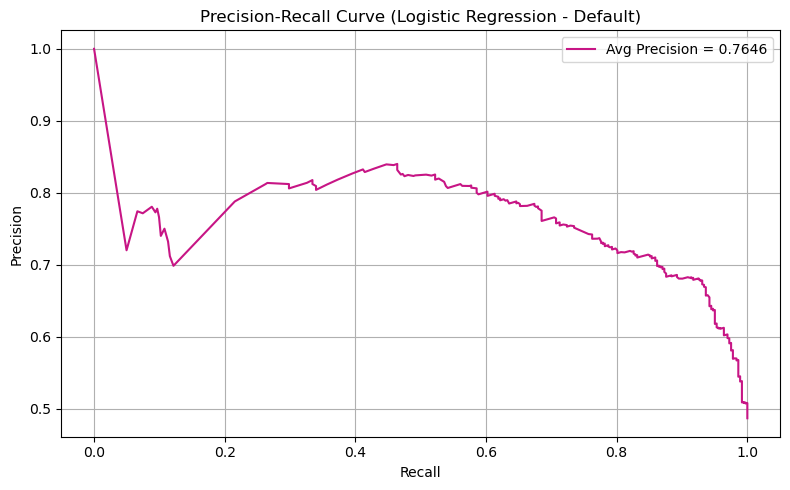

In [86]:
# Get predicted probabilities from the default model
y_proba = lr_default.predict_proba(X_test_lr )[:, 1]

# Compute precision-recall values
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
avg_precision = average_precision_score(y_test, y_proba)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(recall, precision, label=f'Avg Precision = {avg_precision:.4f}', color='mediumvioletred')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (Logistic Regression - Default)")
plt.grid(True)
plt.legend()
plt.tight_layout()

# Save
plt.savefig("Precision_Recall_Curve_Logistic_Regression_Default.png")
plt.show()


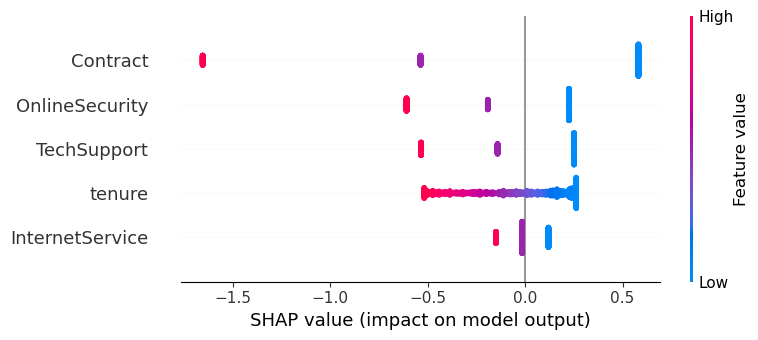

In [87]:
explainer = shap.Explainer(lr_default, X_train_lr)


shap_values = explainer(X_test_lr)

# SHAP summary plot (bar + beeswarm) → save via matplotlib
plt.figure() 
shap.summary_plot(shap_values, X_test_lr, show=False) 

plt.tight_layout()
plt.savefig("shap/shap_summary_logreg.png", dpi=300, bbox_inches='tight')
plt.show()  


## 🔍 Model Explainability (SHAP)

We used SHAP (SHapley Additive exPlanations) to interpret predictions made by our Logistic Regression model trained on selected features. SHAP values quantify how much each feature pushes the model toward predicting **churn** or **no churn** for each customer.

### 📌 Top Predictive Features:

- **Contract type** remains the most impactful feature — customers on **month-to-month contracts** significantly drive the prediction toward churn.
- **OnlineSecurity** and **TechSupport** play important roles — customers who lack these services are more likely to churn.
- **Tenure** shows strong influence — shorter tenure pushes predictions toward churn, while longer tenure helps retain customers.
- **InternetService** also contributes — certain service types (or lack thereof) influence churn behavior.

These findings are **consistent with our EDA insights** and confirm that customers with **limited service engagement and low loyalty indicators** are at a higher risk of churning.

> ✅ SHAP helped validate feature importance and provided transparency into model decisions — supporting actionable business strategies like:
> - Incentivizing longer-term contracts
> - Bundling security and support services
> - Prioritizing retention campaigns for new customers


## 🧠 Key Findings & Strategic Recommendations

Our analysis, supported by both EDA and SHAP-based model interpretation, uncovers clear patterns that explain customer churn behavior:

---

### 🔹 Top Predictive Features (From SHAP & EDA)

1. **Contract Type**  
   - Customers on **month-to-month contracts** are at the highest risk of churn.  
   - 🔁 Long-term contracts (1–2 years) significantly lower churn probability.

2. **Tenure**  
   - Customers with **short tenure** are far more likely to churn.  
   - Longer tenure strongly contributes to customer retention.

3. **Tech Support & Online Security**  
   - Absence of services like **Tech Support** and **Online Security** pushes churn predictions higher.  
   - These optional services act as strong retention tools.

4. **Internet Service Type**  
   - The type or absence of internet service influences churn. Some customers without service churn less, possibly due to lower engagement or dependency.

---

### 📌 Recommendations for Retention Strategy

- **Promote Long-Term Contracts**: Provide incentives or loyalty rewards for customers who switch from month-to-month to annual plans.
- **Upsell Support & Security Bundles**: Offer packages that include Tech Support and Online Security to reduce churn among digitally active users.
- **Early Engagement of New Customers**: Develop onboarding and engagement campaigns for customers within their first few months of tenure.
- **Risk-Based Targeting**: Monitor churn scores for high-risk segments like short-tenure, high-cost customers, and proactively reach out to retain them.

---

### ✅ Conclusion

The model performs well in identifying high-risk churn groups and its decision-making aligns closely with business intuition. These findings reinforce the importance of **contract strategy**, **service bundling**, and **early customer engagement** to minimize churn and strengthen customer lifetime value.
